## Profit estimation of companies with linear regression

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Allows the plot to be displayed next to the code
%matplotlib inline

In [2]:
 #Import dataset
df = pd.DataFrame(pd.read_csv('1000_Companies.csv'))

#Checking out the first few rows of the dataset
print(df.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [3]:
# Checking out the type of data in the dataset
print(df.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


In [4]:
#Checking the shape (# of rows, and columns) in the dataset
print(df.shape)

(1000, 5)


### Data Preparation and Cleaning

<ul>
    <li>The dataset has 5 columns; 4 floats and one categorical </li>
    <li>The next steps will check if there are misssing or invalid data</li>
</ul>

In [5]:
#Check for any null values in the dataset
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

there are no null/empty values in the dataset

In [6]:
#Creating the independent/predictor variables and dependent/response variables
X = df.iloc[:,:-1] #dropping the last column (Profit)
y = df.iloc[:,4]

### Data Visualisation
Building the Correlation matrix


<AxesSubplot:>

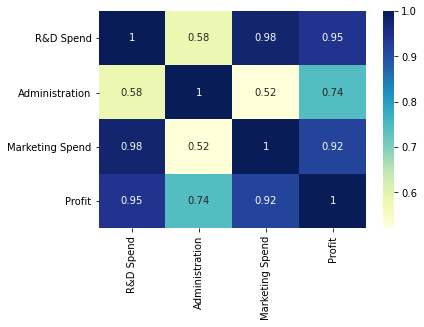

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

### Encoding State feature from string to integers

In [8]:
#Encoding State feature from string to integers
from sklearn import preprocessing
le_state = preprocessing.LabelEncoder()
le_state.fit(X['State'])

list(le_state.classes_)

#Transforming and dropping the Categorical State variable
X['State_']=le_state.transform(X['State'])
X=X.drop(columns='State',axis=1)
X.head()

,R&D Spend,Administration,Marketing Spend,State_
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1


### Determining which of the predictors will be in the model
The variability in each predictor will be observed 

<AxesSubplot:>

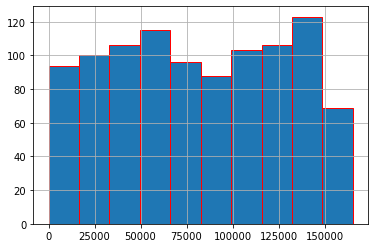

In [9]:
df['R&D Spend'].hist(edgecolor='red')

the variability in the R&D Spend is good and will be included

<AxesSubplot:>

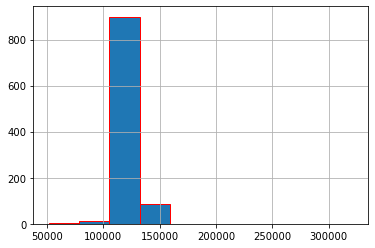

In [10]:
df['Administration'].hist(edgecolor='red')

the variability in the Administration will probably be excluded

<AxesSubplot:>

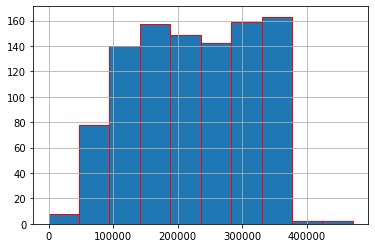

In [11]:
df['Marketing Spend'].hist(edgecolor='red')

the variability in the Marketing Spend is good and will be included

In [12]:
#This variable will be temporarily excluded and evaluated to see its effect on the model
#cols_rejected = ['Administration']

#X = X.drop(columns=cols_rejected,axis=1)
#X.head()

### splitting dataset into train and test

In [13]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### fitting model to training set

In [14]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### predicting the test dataset

In [15]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 89624.88499983,  88261.44060358,  94728.57723845, 176034.49990954,
        83234.84214495, 110393.04058199, 131831.18880607,  91307.52461765,
       164414.26754671,  53585.35570743,  66786.11950078, 150921.89704628,
       126746.78121459,  59174.341725  , 177341.80724482,  75139.98127599,
       118605.9491146 , 164403.24374731, 171336.34862472, 181885.06087421,
       118762.26624783,  85504.5201526 , 181345.84072646,  83979.76201107,
       104839.00200137, 101067.00608604,  53722.31401539,  56706.45386115,
        68732.18107141, 209811.34272095, 121136.34391499, 111557.54775873,
       101309.70393418, 138315.39958078,  63806.10546728, 108690.79660343,
       185830.38310114, 171796.58186122, 174997.97325294, 118029.33822338,
        96553.52264734, 165281.03076793, 107557.31012676,  50557.29080259,
       116871.82636073,  58469.02312669, 158771.35516035,  78902.17488961,
       160082.45834529, 131494.74562654, 185233.67354483, 174962.79318566,
        93579.64586335,  

### finding coefficients and intercepts

In [16]:
# Calculating the Coefficients
print(regressor.coef_)

[ 5.27572958e-01  8.44490415e-01  1.06639226e-01 -3.54869857e+02]


In [17]:
# Calculating the Intercept
print(regressor.intercept_)

-51144.72642572198


### evaluating the model

In [18]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9112595959622046

The R2 was at 80.5% with the Administration variable excluded.

After including the **Administration** variable, the R2 increased to 91.1%